Freq_domain_meas
=================

* **[Cavity search](#Cavity-search)** 
Search the location of the cavity with $sweeping$ $LO$ $frequency$ due to large frequency range (e.g. $5.0$ - $7.0$ GHz)

(Frequency range needs to be a `float` number

* **[Accurate Cavity search](#Accurate-Cavity-search)**
Search the location of the cavity with $sweeping$ $NCO$ $frequency$ due to small frequency range (e.g. $6.0$ - $6.04$ GHz)


* **[Power dependent cavity](#Power-dependent-cavity)** 
Search the location of the dress state cavity with $sweeping$ $NCO$ $frequency$ due to small frequency range (e.g. $6.0$ - $6.004$ GHz)

* **[Flux dependent cavity](#Flux-dependent-cavity)** 

* **[Two-tone](#Two-tone)** 


To run this, you will need:
* [QRM-RF](https://qblox-qblox-instruments.readthedocs-hosted.com/en/master/cluster/qcm_rf.html)
* Device under test: a Superconducting Qubit
* Two SMA-cables
* Installation and enabling of ipywidgets


Cluster Setup
-----

In [22]:
from support import *
from numpy import arange, linspace, logspace
from quantify_scheduler.backends.graph_compilation import SerialCompiler
meas_datadir = './Data/5Qidle'
dh.set_datadir(meas_datadir)
# Connect to Cluster
warnings.simplefilter("ignore")
connect, ip = connect_clusters()



Dropdown(description='Select Device', options=(('Marketing-Cluster @192.168.1.170', '00015_2247_002'),), value…

In [43]:
Instrument.close_all()              # Close all existing QCoDeS Instrument instances
dev_id = connect.value
cluster = Cluster(name = "cluster0", identifier = ip.get(dev_id))
print(f"{connect.label} connected")

# Reset the cluster
cluster.reset()        
print(cluster.get_system_state())
# Hardware settings
hardware_cfg = {
    "backend": "quantify_scheduler.backends.qblox_backend.hardware_compile",
    "cluster0": {
        "sequence_to_file": False,  # Boolean flag which dumps waveforms and program dict to JSON file
        "ref": "internal",  # Use shared clock reference of the cluster
        "instrument_type": "Cluster",
        # ============ DRIVE ============#
        "cluster0_module4": {
            "instrument_type": "QCM_RF",
            "complex_output_0": {
                "output_att": 0,
                "dc_mixer_offset_I": 0.0,
                "dc_mixer_offset_Q": 0.0,
                "portclock_configs": [
                    {
                        "port": "q1:mw",
                        "clock": "q1.01",
                        "interm_freq": 80e6,
                        "mixer_amp_ratio": 1.0,
                        "mixer_phase_error_deg": 0.0,
                    }
                ],
            },
            "complex_output_1": {
                "output_att": 0,
                "dc_mixer_offset_I": 0.0,
                "dc_mixer_offset_Q": 0.0,
                "portclock_configs": [
                    {
                        "port": "q2:mw",
                        "clock": "q2.01",
                        "interm_freq": 80e6,
                        "mixer_amp_ratio": 1.0,
                        "mixer_phase_error_deg": 0.0,
                    }
                ],
            },
        },
        "cluster0_module6": {
            "instrument_type": "QCM_RF",
            "complex_output_0": {
                "output_att": 0,
                "dc_mixer_offset_I": 0.0,
                "dc_mixer_offset_Q": 0.0,
                "portclock_configs": [
                    {
                        "port": "q3:mw",
                        "clock": "q3.01",
                        "interm_freq": 80e6,
                        "mixer_amp_ratio": 1.0,
                        "mixer_phase_error_deg": 0.0,
                    }
                ],
            },
            "complex_output_1": {
                "output_att": 0,
                "dc_mixer_offset_I": 0.0,
                "dc_mixer_offset_Q": 0.0,
                "portclock_configs": [
                    {
                        "port": "q4:mw",
                        "clock": "q4.01",
                        "interm_freq": 80e6,
                        "mixer_amp_ratio": 1.0,
                        "mixer_phase_error_deg": 0.0,
                    }
                ],
            },
        },
        "cluster0_module12": {
            "instrument_type": "QCM_RF",
            "complex_output_0": {
                "output_att": 0,
                "dc_mixer_offset_I": 0.0,
                "dc_mixer_offset_Q": 0.0,
                "portclock_configs": [
                    {
                        "port": "q5:mw",
                        "clock": "q5.01",
                        "interm_freq": 80e6,
                        "mixer_amp_ratio": 1.0,
                        "mixer_phase_error_deg": 0.0,
                    }
                ],
            },
        },
        # ============ FLUX ============#
        "cluster0_module2": {
            "instrument_type": "QCM",
            "real_output_0": {"portclock_configs": [{"port": "q1:fl", "clock": "cl0.baseband"}]},
            "real_output_1": {"portclock_configs": [{"port": "q2:fl", "clock": "cl0.baseband"}]},
            "real_output_2": {"portclock_configs": [{"port": "q3:fl", "clock": "cl0.baseband"}]},
            "real_output_3": {"portclock_configs": [{"port": "q4:fl", "clock": "cl0.baseband"}]},
        },
        "cluster0_module10": {
            "instrument_type": "QCM",
            "real_output_0": {"portclock_configs": [{"port": "q5:fl", "clock": "cl0.baseband"}]},
        },
        # ============ READOUT ============#
        "cluster0_module8": {
            "instrument_type": "QRM_RF",
            "complex_output_0": {
                "output_att": 0,
                "input_att": 0,
                "dc_mixer_offset_I": 0.0,
                "dc_mixer_offset_Q": 0.0,
                "lo_freq": 5.95e9,       # *** Should be set as a parameter later on
                "portclock_configs": [
                    {
                        "port": "q1:res",
                        "clock": "q1.ro",
                        "mixer_amp_ratio": 1.0,
                        "mixer_phase_error_deg": 0.0,
                    },
                    {
                        "port": "q2:res",
                        "clock": "q2.ro",
                        "mixer_amp_ratio": 1.0,
                        "mixer_phase_error_deg": 0.0,
                    },
                    {
                        "port": "q3:res",
                        "clock": "q3.ro",
                        "mixer_amp_ratio": 1.0,
                        "mixer_phase_error_deg": 0.0,
                    },
                    {
                        "port": "q4:res",
                        "clock": "q4.ro",
                        "mixer_amp_ratio": 1.0,
                        "mixer_phase_error_deg": 0.0,
                    },
                    {
                        "port": "q5:res",
                        "clock": "q5.ro",
                        "mixer_amp_ratio": 1.0,
                        "mixer_phase_error_deg": 0.0,
                    },
                ],
            },
        },
    },
}

# quantum device, measctrler, coordinator set up 
quantum_device = create_quantum_device(hardware_cfg, num_qubits=5)
meas_ctrl, instrument_coordinator = configure_measurement_control_loop(quantum_device, cluster)

# Flux bias setting
flux_settable_map: callable = {
    "q1":cluster.module2.out0_offset,
    "q2":cluster.module2.out1_offset,
    "q3":cluster.module2.out2_offset,
    "q4":cluster.module2.out3_offset,
    "q5":cluster.module10.out0_offset
}
# default the offset in circuit
for i in flux_settable_map:
    flux_settable_map[i](0.00)


# Activate NCO delay compensation
for i in range(6):
    getattr(cluster.module8, f"sequencer{i}").nco_prop_delay_comp_en(True)
    getattr(cluster.module8, f"sequencer{i}").nco_prop_delay_comp(50)

# def plot pluse preview 
def pulse_preview(quantum_device:QuantumDevice,sche_func:Schedule, sche_kwargs:dict, **kwargs):
    device_compiler = SerialCompiler("Device compiler", quantum_device)
    comp_sched = device_compiler.compile(
        sche_func(**sche_kwargs)
    )
    comp_sched.plot_pulse_diagram(plot_backend="mpl",**kwargs)
    
    


Marketing-Cluster @192.168.1.170 connected
Status: OKAY, Flags: NONE, Slot flags: NONE


In [44]:
# Attenuation setting. We don't change it once we set it.
ro_out_att = 20
xy_out_att = 10
# atte. setting
set_atte_for(quantum_device,ro_out_att,'ro',list(flux_settable_map.keys()))
set_atte_for(quantum_device,xy_out_att,'xy',list(flux_settable_map.keys()))

In [45]:
# Some designed value 
estimate_f_resonator = dict(
    q1 = 5.72035 * 1e9,
    q2 = 6.0085 * 1e9,
    q3 = 5.83875 * 1e9,
    q4 = 6.1073 * 1e9,
    q5 = 5.9139 * 1e9,
)
estimate_f_qubits = dict(
    q1 = 4.116883353122914 * 1e9,
    q2 = 4.232816338702908 * 1e9,
    q3 = 3.8418045414828643 * 1e9,
    q4 = 4.022 * 1e9,
    q5 = 2.5738611635902258 * 1e9,
)

Accurate Cavity search
-------------

After fixing the approximate resonator frequencies, 
sweeping NCO frequency to get the location frequency of all cavities, 
the frequency you get will be the accurate $bare$ $state$ $frequency$.

This can also check the $dress$ $state$ $frequency$ by changing **ro_out_att** value.

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 freq 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

q1 Cavity:
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 freq 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

q2 Cavity:
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 freq 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

q3 Cavity:
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 freq 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

q4 Cavity:
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 freq 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

q5 Cavity:


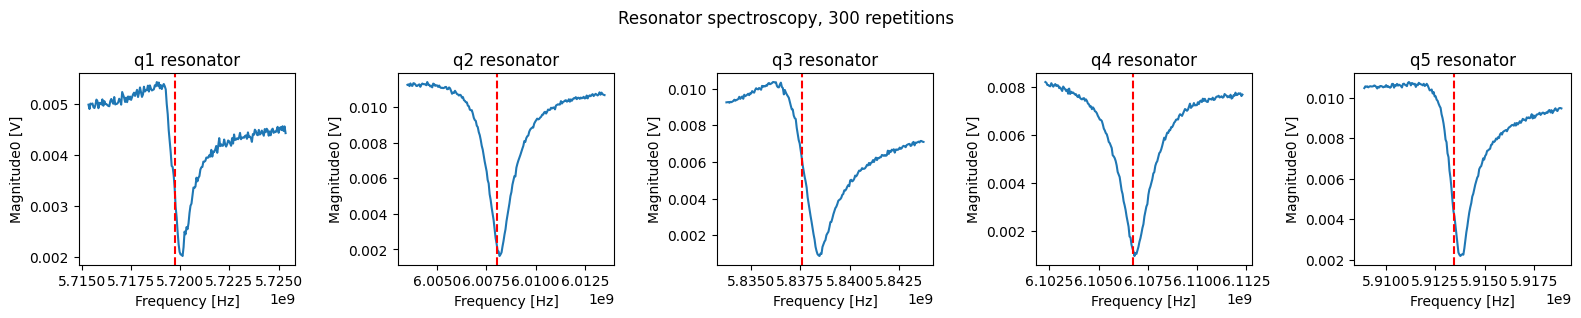

In [46]:

ro_element = list(flux_settable_map.keys())
def CavitySearch(quantum_device:QuantumDevice,ro_elements:list,estimation:dict,ro_span_Hz:int,n_avg:int=300,fitpoint:int=200,run:bool=True)->(dict,dict):
    sche_func = heterodyne_spec_sched_nco
    analysis_result = {}
    for q in ro_elements:
        rof_center = estimation[q]
        qubit = quantum_device.get_element(q)
        rof_samples = linspace(rof_center-ro_span_Hz,rof_center+ro_span_Hz,fitpoint)

        # declare variables
        freq = ManualParameter(name="freq", unit="Hz", label="Frequency")
        freq.batched = True
        freq.batch_size = 100

        # requisition
        spec_sched_kwargs = dict(    # *** Try to draw the prospective wave as a plot for a great check of the outputting pulse. And turn them into parameters
            pulse_amp=0.1,           # *** Check the unit of amplitude, only scale or volt # Can be set as a parameter
            pulse_duration=2e-6,     # *** Can be set as a parameter
            frequencies=freq,
            acquisition_delay=80e-9,# *** Can be set as a parameter
            integration_time=1.5e-6,   # *** Can be set as a parameter
            port=qubit.ports.readout(),
            clock=qubit.name + ".ro",
            init_duration=10e-6,     # *** Can be set as a parameter
        )
    
        # show_args(spec_sched_kwargs, title="spec_sched_kwargs")  # *** Try to insert this into interfaces

        # send the requisition to MeasurementControl-er
        if run:
            gettable = ScheduleGettable(
                quantum_device,
                schedule_function=sche_func,  # *** Def: https://quantify-os.org/docs/quantify-scheduler/dev/autoapi/quantify_scheduler/schedules/index.html
                schedule_kwargs=spec_sched_kwargs,
                real_imag=False,
                batched=True,
            )
            quantum_device.cfg_sched_repetitions(n_avg)
            meas_ctrl.gettables(gettable)
            meas_ctrl.settables(freq)
            meas_ctrl.setpoints(rof_samples)

            # MeasurementControl-er start measurement by the requisition
         
            rs_ds = meas_ctrl.run("resonator spectroscopy")
            rs_ds

            # Analysis
            analysis_result[q] = ResonatorSpectroscopyAnalysis(tuid=rs_ds.attrs["tuid"], dataset=rs_ds).run()
            print(f"{q} Cavity:")
            # feedback
            # qubit.clock_freqs.readout(analysis_result[q].quantities_of_interest['fr'].nominal_value)
        else:
            spec_sched_kwargs["frequencies"] = np.array([np.max(rof_samples)]) # type is array
            pulse_preview(quantum_device,sche_func,spec_sched_kwargs)
    return analysis_result, spec_sched_kwargs

execute=True
CS_results, spec = CavitySearch(quantum_device,ro_element,estimate_f_resonator,5e6,run=execute)
if execute:
    CSresults_alignPlot(quantum_device,CS_results)
# # see fittings
# for q in CS_results:
#     CS_results[q].display_figs_mpl()

In [34]:

# fill up the spec for qubit like reset-time, ROL, ROW, ROF...
executor = True
if executor:
    for q in CS_results:
        qubit = quantum_device.get_element(q)
        qubit.reset.duration(100e-6)
        qubit.measure.acq_delay(spec["acquisition_delay"])
        qubit.measure.pulse_amp(spec["pulse_amp"])
        qubit.measure.pulse_duration(spec["pulse_duration"])
        qubit.measure.integration_time(spec["integration_time"])
        qubit.clock_freqs.readout(CS_results[q].quantities_of_interest["fr"].nominal_value)
        show_readout_args(qubit)
    executor = False

q1.measure
pulse_type                = SquarePulse
pulse_amp                 = 0.1
pulse_duration            = 2e-06
acq_channel               = 1
acq_delay                 = 8e-08
integration_time          = 1.5e-06
reset_clock_phase         = True
acq_weights_a             = None
acq_weights_b             = None
acq_weights_sampling_rate = None
acq_weight_type           = SSB
acq_rotation              = 0
acq_threshold             = 0

q1.reset
duration = 0.0001

q1.clock_freqs
readout = 5719765518.627899
q2.measure
pulse_type                = SquarePulse
pulse_amp                 = 0.1
pulse_duration            = 2e-06
acq_channel               = 2
acq_delay                 = 8e-08
integration_time          = 1.5e-06
reset_clock_phase         = True
acq_weights_a             = None
acq_weights_b             = None
acq_weights_sampling_rate = None
acq_weight_type           = SSB
acq_rotation              = 0
acq_threshold             = 0

q2.reset
duration = 0.0001

q2.clock_freqs
re

Power dependent cavity
------------------------

Sweeping NCO frequency to get the location dress state frequency of each cavity found in cavity search, with 2D plot we can get the $intensity$ $of$ $the$ $signal$ and $dress$ $state$ $frequency$

The Q1ASM sequencer program only supports integer values. However, the NCO has a frequency resolution of 0.25 Hz. As such, the frequency values in the sequencer program must be given as integer multiples of $1/4$ Hz.

spec_sched_kwargs
pulse_amp         = ro_pulse_amp
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
init_duration     = 1e-05
port              = q1:res
clock             = q1.ro
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 ro_pulse_amp 
Batched settable(s):
	 freq 
Batch size limit: 900



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

spec_sched_kwargs
pulse_amp         = ro_pulse_amp
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
init_duration     = 1e-05
port              = q2:res
clock             = q2.ro
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 ro_pulse_amp 
Batched settable(s):
	 freq 
Batch size limit: 900



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

spec_sched_kwargs
pulse_amp         = ro_pulse_amp
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
init_duration     = 1e-05
port              = q3:res
clock             = q3.ro
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 ro_pulse_amp 
Batched settable(s):
	 freq 
Batch size limit: 900



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

spec_sched_kwargs
pulse_amp         = ro_pulse_amp
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
init_duration     = 1e-05
port              = q4:res
clock             = q4.ro
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 ro_pulse_amp 
Batched settable(s):
	 freq 
Batch size limit: 900



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

spec_sched_kwargs
pulse_amp         = ro_pulse_amp
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
init_duration     = 1e-05
port              = q5:res
clock             = q5.ro
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 ro_pulse_amp 
Batched settable(s):
	 freq 
Batch size limit: 900



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

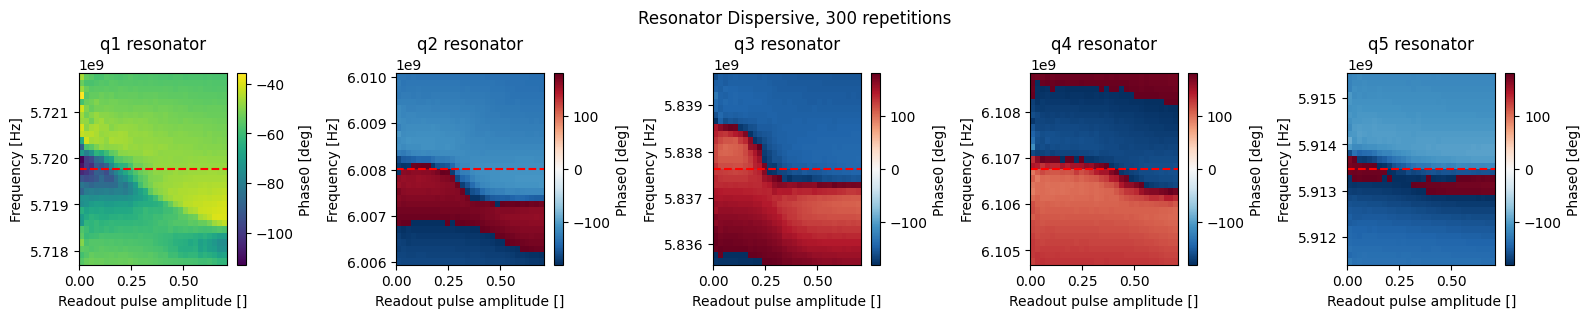

In [37]:
def PowerDep(quantum_device:QuantumDevice,ro_elements:list,ro_span_Hz:int=2e6,n_avg:int=300,rol_point:int=20,rof_point:int=20,max_rol:float=0.7,run:bool=True)->dict:
    sche_func = heterodyne_spec_sched_nco
    analysis_result = {}
    for q in ro_elements:
        qubit = quantum_device.get_element(q)
        rof_center = qubit.clock_freqs.readout()  # Range ~4MHz
        rof_samples = linspace(rof_center-ro_span_Hz,rof_center+ro_span_Hz,rof_point)
        rol_samples = linspace(0.01,max_rol,rol_point)

        # declare variables
        freq = ManualParameter(name="freq", unit="Hz", label="Frequency")
        freq.batched = True

        ro_pulse_amp = ManualParameter(name="ro_pulse_amp", unit="", label="Readout pulse amplitude")
        ro_pulse_amp.batched = False
        # Two axis need two ManualParameters

        # Requisition
        spec_sched_kwargs = dict(
            pulse_amp=ro_pulse_amp,
            pulse_duration=qubit.measure.pulse_duration(),
            frequencies=freq,
            acquisition_delay=qubit.measure.acq_delay(),
            integration_time=qubit.measure.integration_time(),
            init_duration=10e-6, # only cavity shorter is enough
            port=qubit.ports.readout(),
            clock=qubit.name + ".ro",
        )
        
        show_args(spec_sched_kwargs, title="spec_sched_kwargs")

        # send the requisition to MeasurementControl-er
        if run:
            gettable = ScheduleGettable(
                quantum_device,
                schedule_function=sche_func,
                schedule_kwargs=spec_sched_kwargs,
                real_imag=False,
                batched=True,
            )
            quantum_device.cfg_sched_repetitions(n_avg)
            meas_ctrl.gettables(gettable)
            meas_ctrl.settables([freq, ro_pulse_amp])
            meas_ctrl.setpoints_grid((rof_samples, rol_samples))

            # MeasurementControl-er start measurement by the requisition
            punchout_ds = meas_ctrl.run("resonator punchout")
            punchout_ds

            # analysis
            analysis_result[q] = Basic2DAnalysis(tuid=punchout_ds.attrs["tuid"], dataset=punchout_ds).run()
        else:
            spec_sched_kwargs['pulse_amp'] = np.max(rol_samples) # type is float or int
            spec_sched_kwargs['frequencies'] = np.array([np.max(rof_samples)])
            pulse_preview(quantum_device,sche_func,spec_sched_kwargs)

        # TODO: feedback 
    return analysis_result

execute = True
PD_results = PowerDep(quantum_device,ro_element,rol_point=30,rof_point=30,run=execute)
if execute:
    PDresults_alignPlot(quantum_device,PD_results)
# for q in PD_results:
#     print(f"{q}:")
#     PD_results[q].display_figs_mpl()



In [38]:

ans = [[5.7198e9,0.03],[6.0082e9,0.1],[5.8385e9,0.07],[6.1069e9,0.1],[5.9137e9,0.07]]
executor = True
if executor:
    for idx in range(5):
        qubit = quantum_device.get_element(ro_element[idx])
        qubit.measure.pulse_amp(ans[idx][-1])
        qubit.clock_freqs.readout(ans[idx][0])
        show_readout_args(qubit)
    executor = False

q1.measure
pulse_type                = SquarePulse
pulse_amp                 = 0.03
pulse_duration            = 2e-06
acq_channel               = 1
acq_delay                 = 8e-08
integration_time          = 1.5e-06
reset_clock_phase         = True
acq_weights_a             = None
acq_weights_b             = None
acq_weights_sampling_rate = None
acq_weight_type           = SSB
acq_rotation              = 0
acq_threshold             = 0

q1.reset
duration = 0.0001

q1.clock_freqs
readout = 5719800000.0
q2.measure
pulse_type                = SquarePulse
pulse_amp                 = 0.1
pulse_duration            = 2e-06
acq_channel               = 2
acq_delay                 = 8e-08
integration_time          = 1.5e-06
reset_clock_phase         = True
acq_weights_a             = None
acq_weights_b             = None
acq_weights_sampling_rate = None
acq_weight_type           = SSB
acq_rotation              = 0
acq_threshold             = 0

q2.reset
duration = 0.0001

q2.clock_freqs
readou

Flux dependent cavity
---
> Need to set output channel as a parameter

spec_sched_kwargs
pulse_amp         = 0.03
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
init_duration     = 0.0001
port              = q1:res
clock             = q1.ro
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 out0_offset 
Batched settable(s):
	 freq 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

spec_sched_kwargs
pulse_amp         = 0.1
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
init_duration     = 0.0001
port              = q2:res
clock             = q2.ro
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 out1_offset 
Batched settable(s):
	 freq 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

spec_sched_kwargs
pulse_amp         = 0.07
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
init_duration     = 0.0001
port              = q3:res
clock             = q3.ro
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 out2_offset 
Batched settable(s):
	 freq 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

spec_sched_kwargs
pulse_amp         = 0.1
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
init_duration     = 0.0001
port              = q4:res
clock             = q4.ro
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 out3_offset 
Batched settable(s):
	 freq 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

spec_sched_kwargs
pulse_amp         = 0.07
pulse_duration    = 2e-06
frequencies       = freq
acquisition_delay = 8e-08
integration_time  = 1.5e-06
init_duration     = 0.0001
port              = q5:res
clock             = q5.ro
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 out0_offset 
Batched settable(s):
	 freq 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

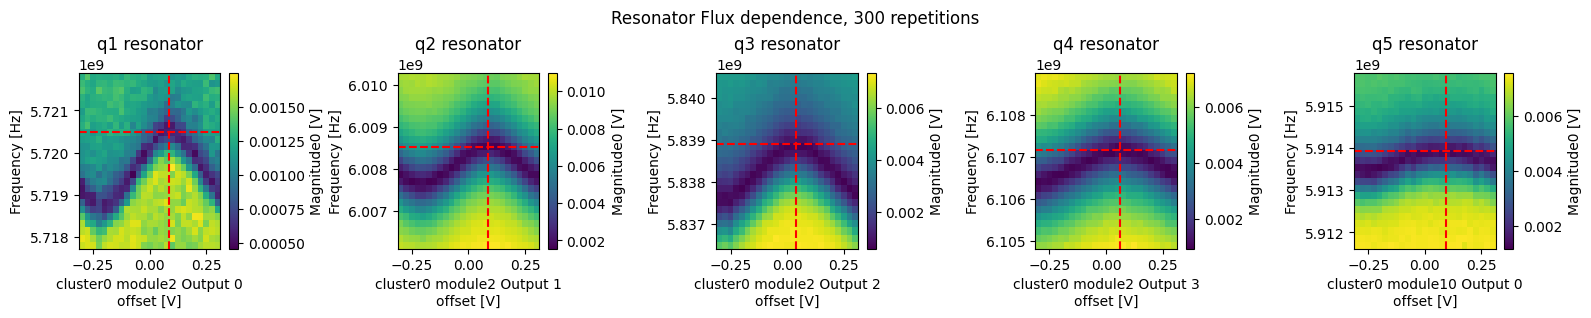

In [40]:
def FluxDep(quantum_device:QuantumDevice,ro_elements:list,ro_span_Hz:int=2e6,flux_span:float=0.3,n_avg:int=300,flux_point:int=25,rof_point:int=25,run:bool=True):
    sche_func = heterodyne_spec_sched_nco
    analysis_result = {}
    for q in ro_elements:
        qubit = quantum_device.get_element(q)
        rof_center = qubit.clock_freqs.readout()  # Range ~4MHz
        rof_samples = linspace(rof_center-ro_span_Hz,rof_center+ro_span_Hz,rof_point)
        bias_samples = linspace(-flux_span,flux_span,flux_point)

        # declare variables
        freq = ManualParameter(name="freq", unit="Hz", label="Frequency")
        freq.batched = True
        freq.batch_size = 100

        # Requisition
        spec_sched_kwargs = dict(
            pulse_amp=qubit.measure.pulse_amp(),
            pulse_duration=qubit.measure.pulse_duration(),
            frequencies=freq,
            acquisition_delay=qubit.measure.acq_delay(),
            integration_time=qubit.measure.integration_time(),
            init_duration=qubit.reset.duration(),
            port=qubit.ports.readout(),
            clock=qubit.name + ".ro",
        )
        show_args(spec_sched_kwargs, title="spec_sched_kwargs")
        if run:
            gettable = ScheduleGettable(
                quantum_device,
                schedule_function=sche_func,
                schedule_kwargs=spec_sched_kwargs,
                real_imag=False,
                batched=True,
            )
            # send the requisition to MeasurementControl-er
            quantum_device.cfg_sched_repetitions(n_avg)
            meas_ctrl.gettables(gettable)
            meas_ctrl.settables([freq, flux_settable_map[q]]) 
            meas_ctrl.setpoints_grid((rof_samples, bias_samples))

            # MeasurementControl-er start measurement by the requisition
            rfs_ds = meas_ctrl.run("resonator flux spectroscopy")
            rfs_ds

            # analysis
            analysis_result[q] = ResonatorFluxSpectroscopyAnalysis(tuid=rfs_ds.attrs["tuid"], dataset=rfs_ds).run()
            
            # Feedback
            # qubit.clock_freqs.readout(rfs_analysis.quantities_of_interest["freq_0"])
            # flux_settable(rfs_analysis.quantities_of_interest["offset_0"].nominal_value)
        else:
            spec_sched_kwargs['frequencies'] = np.array([np.max(rof_samples)])
            pulse_preview(quantum_device,sche_func,spec_sched_kwargs)
            # TODO: add flux channel into figure
            
    return analysis_result

execute = True
FD_results = FluxDep(quantum_device,ro_element,run=execute)
if execute:
    FD_results_alignPlot(quantum_device,FD_results,show_mode='amp')

# for q in FD_results:
#     FD_results[q].run(fit_method="fast", sweetspot_index=0).display_figs_mpl()

In [41]:
wannaMeas_q = ['q1']
tuneAway_bias = [None,-0.24,-0.25,-0.25,-0.25]
executor = True
if executor:
    for idx,q in enumerate(FD_results):
        qubit = quantum_device.get_element(q)
        if q in wannaMeas_q:
            qubit.clock_freqs.readout(FD_results[q].quantities_of_interest["freq_0"])
            flux_settable_map[q](FD_results[q].quantities_of_interest["offset_0"].nominal_value)
        else:
            #TODO: tune away resonator freq: qubit.clock_freqs.readout(freq)
            flux_settable_map[q](tuneAway_bias[idx])
        show_readout_args(qubit)
    for k, v in flux_settable_map.items():
        print("flux setpoint", k, v(), v.unit)
    executor = False

q1.measure
pulse_type                = SquarePulse
pulse_amp                 = 0.03
pulse_duration            = 2e-06
acq_channel               = 1
acq_delay                 = 8e-08
integration_time          = 1.5e-06
reset_clock_phase         = True
acq_weights_a             = None
acq_weights_b             = None
acq_weights_sampling_rate = None
acq_weight_type           = SSB
acq_rotation              = 0
acq_threshold             = 0

q1.reset
duration = 0.0001

q1.clock_freqs
readout = 5720485195.624962
q2.measure
pulse_type                = SquarePulse
pulse_amp                 = 0.1
pulse_duration            = 2e-06
acq_channel               = 2
acq_delay                 = 8e-08
integration_time          = 1.5e-06
reset_clock_phase         = True
acq_weights_a             = None
acq_weights_b             = None
acq_weights_sampling_rate = None
acq_weight_type           = SSB
acq_rotation              = 0
acq_threshold             = 0

q2.reset
duration = 0.0001

q2.clock_freqs
r

Two-tone
----

> Under construction


qubit_spec_sched_kwargs
qubit_name             = q1
spec_pulse_amp         = 0.05
spec_pulse_duration    = 4.8e-05
spec_pulse_port        = q1:mw
spec_pulse_clock       = q1.01
spec_pulse_frequencies = freq


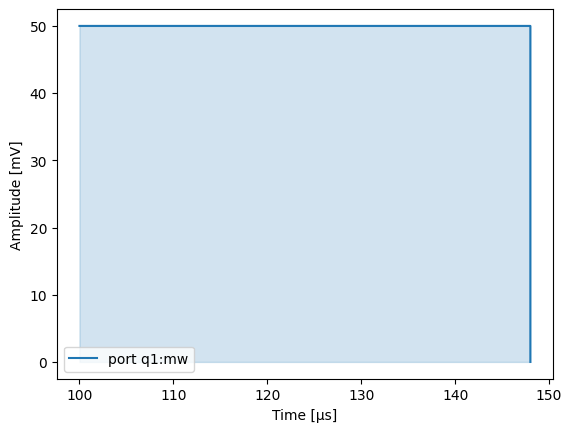

In [42]:
def QubitSearch(quantum_device:QuantumDevice,ro_elements:list,estimation:dict,xyf_span_Hz:int=200e6,xyl:list=[0.1],n_avg:int=1000,fitpoint:int=200,run:bool=True):
    # Check xyl size
    if len(xyl) != len(ro_elements):
        xyll = []
        for i in ro_elements:
            xyll.append(xyl[0])
        xyl = xyll
    sche_func = two_tone_spec_sched_nco
    analysis_result = {}
    for idx, q in enumerate(ro_elements):
        qubit = quantum_device.get_element(q)
        xyf_center = estimation[q]
        xyf_samples = linspace(xyf_center-xyf_span_Hz,xyf_center+xyf_span_Hz,fitpoint)

        # declare the variables
        freq = ManualParameter(name="freq", unit="Hz", label="Frequency")
        freq.batched = True
        freq.batch_size = 100

        # Requisition
        qubit_spec_sched_kwargs = dict(
            qubit_name=qubit.name,
            spec_pulse_amp=xyl[idx],
            spec_pulse_duration=48e-6,
            spec_pulse_port=qubit.ports.microwave(),
            spec_pulse_clock=qubit.name + ".01",
            spec_pulse_frequencies=freq    
        )
        show_args(qubit_spec_sched_kwargs, title="qubit_spec_sched_kwargs")

        # send the requisition to MeasurementControl-er
        if run:
            gettable = ScheduleGettable(
                quantum_device,
                schedule_function=sche_func,
                schedule_kwargs=qubit_spec_sched_kwargs,
                real_imag=False,
                batched=True,
            )
            quantum_device.cfg_sched_repetitions(n_avg)
            meas_ctrl.gettables(gettable)
            meas_ctrl.settables(freq)
            meas_ctrl.setpoints(xyf_samples)

            # MeasurementControl-er start measurement by the requisition
            qs_ds = meas_ctrl.run("Two-tone")
            qs_ds

            # analysis
            analysis_result[q] = QubitSpectroscopyAnalysis(tuid=qs_ds.attrs["tuid"], dataset=qs_ds).run()
            
            # Feedback
            # qubit.clock_freqs.f01(qs_analysis.quantities_of_interest['frequency_01'].nominal_value)
        else:
            qubit_spec_sched_kwargs["spec_pulse_frequencies"] = np.array([np.max(xyf_samples)])
            pulse_preview(quantum_device,sche_func,qubit_spec_sched_kwargs)
    return analysis_result

ro_element = ['q1']
execute = False
QS_results = QubitSearch(quantum_device,ro_element,estimate_f_qubits,fitpoint=100,n_avg=2000,xyl=[0.05],run=execute)
if execute:
    for q in QS_results:
        QS_results[q].display_figs_mpl()

In [61]:
executor = True
if executor:
    for q in QS_results:
        qubit = quantum_device.get_element(q)
        qubit.clock_freqs.f01(QS_results[q].quantities_of_interest['frequency_01'].nominal_value)
        show_drive_args(qubit)
    executor = False


q1.rxy
amp180   = 0.39619894517101406
motzoi   = 0
duration = 2e-08

q1.clock_freqs
f01 = 4078607189.721444
q2.rxy
amp180   = nan
motzoi   = 0
duration = 2e-08

q2.clock_freqs
f01 = 4218807045.6393905


## power Rabi oscillation


rabi_sched_kwargs
pulse_amp      = pulse_amplitude
pulse_duration = 2e-08
frequency      = 4078607189.721444
qubit          = q1
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 pulse_amplitude 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

rabi_sched_kwargs
pulse_amp      = pulse_amplitude
pulse_duration = 2e-08
frequency      = 4218807045.6393905
qubit          = q2
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 pulse_amplitude 
Batch size limit: 100



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

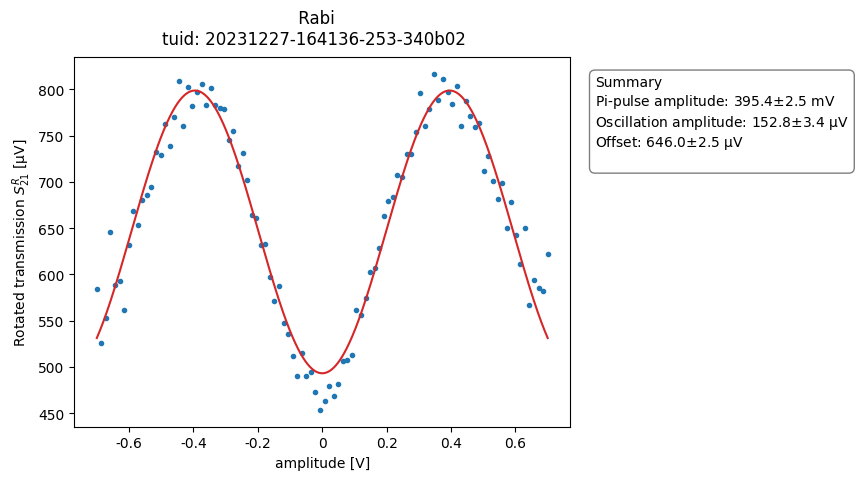

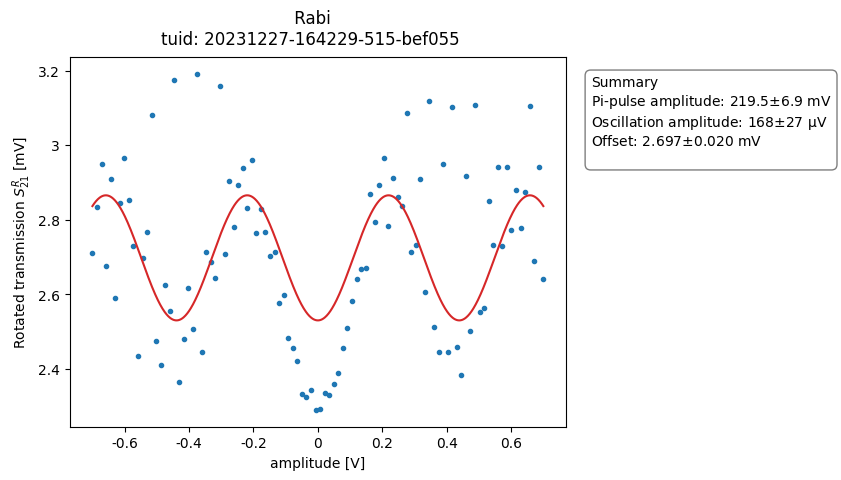

In [62]:
def powR(quantum_device:QuantumDevice,ro_elements:list,xyl_span:float=0.7,n_avg:int=5000,fitpoint:int=100):
    analysis_result = {}
    for q in ro_elements:
        qubit = quantum_device.get_element(q)
        xyl_samples = np.linspace(-xyl_span, xyl_span, fitpoint)

        # declare the variables
        ctrl_pulse_amp = ManualParameter(name="pulse_amplitude", unit="V", label="amplitude")
        ctrl_pulse_amp.batched = True
        ctrl_pulse_amp.batch_size = 100

        # Requisition
        rabi_sched_kwargs = {
            "pulse_amp": ctrl_pulse_amp,
            "pulse_duration": qubit.rxy.duration(),
            "frequency": qubit.clock_freqs.f01(),
            "qubit": qubit.name,
        }
        gettable = ScheduleGettable(
            quantum_device,
            schedule_function=rabi_sched,
            schedule_kwargs=rabi_sched_kwargs,
            batched=True,
        )
        show_args(rabi_sched_kwargs, title="rabi_sched_kwargs")

        # send the requisition to MeasurementControl-er
        quantum_device.cfg_sched_repetitions(n_avg)
        meas_ctrl.gettables(gettable)
        meas_ctrl.settables(ctrl_pulse_amp)
        meas_ctrl.setpoints(xyl_samples)

        # MeasurementControl-er start measurement by the requisition
        rabi_ds = meas_ctrl.run("Rabi")
        rabi_ds

        # Analysis
        analysis_result[q] = RabiAnalysis(tuid=rabi_ds.attrs["tuid"], dataset=rabi_ds).run()

        # Feedback
        # qubit.rxy.amp180(rabi_analysis.quantities_of_interest["Pi-pulse amplitude"].nominal_value)
    return analysis_result
  
powR_results = powR(quantum_device,ro_element)

for q in powR_results:
    powR_results[q].display_figs_mpl()
        

In [63]:
executor = True
if executor:
    for q in powR_results:
        qubit = quantum_device.get_element(q)
        qubit.rxy.amp180(powR_results[q].quantities_of_interest["Pi-pulse amplitude"].nominal_value)
        show_drive_args(qubit)
    executor = False


q1.rxy
amp180   = 0.3954174956450873
motzoi   = 0
duration = 2e-08

q1.clock_freqs
f01 = 4078607189.721444
q2.rxy
amp180   = 0.219452081543955
motzoi   = 0
duration = 2e-08

q2.clock_freqs
f01 = 4218807045.6393905


## Time Rabi

rabi_sched_kwargs
pulse_amp      = 0.39619894517101406
pulse_duration = pulse_duration
frequency      = 4113154274.285156
qubit          = q1
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 pulse_duration 
Batch size limit: 50



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

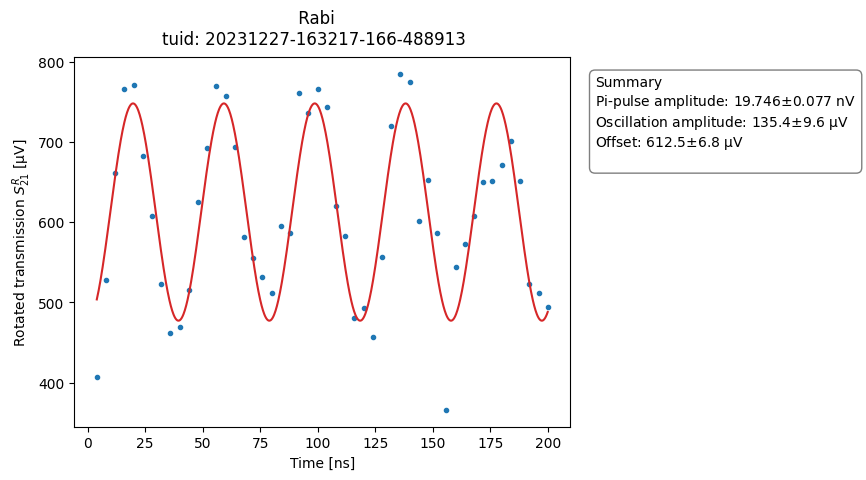

In [51]:
def timR(quantum_device:QuantumDevice,ro_elements:list,xyw_span:float=200e-9,n_avg:int=5000,time_resolutions:float=4e-9):
    xyw_samples = arange(4e-9, xyw_span+time_resolutions, time_resolutions)
    analysis_result = {}
    for q in ro_elements:
        qubit = quantum_device.get_element(q)
        # declare the variables
        ctrl_pulse_dura = ManualParameter(name="pulse_duration", unit="s", label="Time")
        ctrl_pulse_dura.batched = True

        # Requisition
        rabi_sched_kwargs = {
            "pulse_amp": qubit.rxy.amp180(),
            "pulse_duration": ctrl_pulse_dura,
            "frequency": qubit.clock_freqs.f01(),
            "qubit": qubit.name,
        }
        gettable = ScheduleGettable(
            quantum_device,
            schedule_function=rabi_sched,
            schedule_kwargs=rabi_sched_kwargs,
            batched=True,
        )
        show_args(rabi_sched_kwargs, title="rabi_sched_kwargs")

        # send the requisition to MeasurementControl-er
        quantum_device.cfg_sched_repetitions(n_avg)
        meas_ctrl.gettables(gettable)
        meas_ctrl.settables(ctrl_pulse_dura)
        meas_ctrl.setpoints(xyw_samples)

        # MeasurementControl-er start measurement by the requisition
        rabi_ds = meas_ctrl.run("Rabi")
        rabi_ds

        # Analysis
        analysis_result[q] = RabiAnalysis(tuid=rabi_ds.attrs["tuid"], dataset=rabi_ds).run()

        # Feedback
        
    return analysis_result  


timR_results = timR(quantum_device,ro_element)       
for q in timR_results:
    timR_results[q].display_figs_mpl()
       

## Ramsey

ramsey_sched_kwargs
qubit               = q1
times               = tau
artificial_detuning = 1000000.0
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau 
Batch size limit: 100



ERROR:quantify_scheduler.instrument_coordinator.components.qblox:[ic_cluster0_module4|seq1] AWG_WAVE_PLAYBACK_INDEX_INVALID_PATH_0 - AWG path 0 tried to play an unknown waveform.
ERROR:quantify_scheduler.instrument_coordinator.components.qblox:[ic_cluster0_module4|seq1] AWG_WAVE_PLAYBACK_INDEX_INVALID_PATH_1 - AWG path 1 tried to play an unknown waveform.


Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

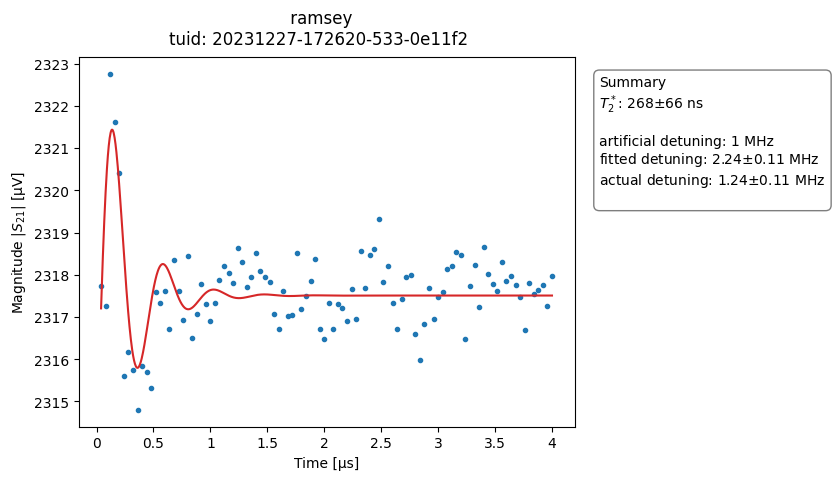

In [82]:
def ramsey(quantum_device:QuantumDevice,ro_elements:list,max_evoTime:float=15e-6,n_avg:int=2000,time_resolutions:float=80e-9,virtual_detune:list=[0.0], histo_num:int=1):
    revo_samples = arange(40e-9, max_evoTime+time_resolutions, time_resolutions)
    if len(virtual_detune) != len(ro_elements):
        df = []
        for i in ro_elements:
            df.append(virtual_detune[0])
        virtual_detune = df
    if len(ro_elements) > 1:
        histo_num = 1
    analysis_result = {}
    T2_us = {}
    for idx, q in enumerate(ro_elements):
        qubit = quantum_device.get_element(q)

        # declare variables
        tau = ManualParameter(name="tau", unit="s", label="Time")
        tau.batched = True
        tau.batch_size = 100
        # Requisition
        ramsey_sched_kwargs = {
            "qubit": qubit.name,
            "times": tau,
            "artificial_detuning": virtual_detune[idx],
        }
        gettable = ScheduleGettable(
            quantum_device,
            schedule_function=ramsey_sched,
            schedule_kwargs=ramsey_sched_kwargs,
            real_imag=False,
            batched=True,
        )
        show_args(ramsey_sched_kwargs, title="ramsey_sched_kwargs")

        # send the requisition to MeasurementControl-er
        quantum_device.cfg_sched_repetitions(n_avg)
        meas_ctrl.gettables(gettable)
        meas_ctrl.settables(tau)
        meas_ctrl.setpoints(revo_samples)

        # MeasurementControl-er start measurement by the requisition
        T2_us[q] = []
        for count in range(histo_num):
            ramsey_ds = meas_ctrl.run("ramsey")
            ramsey_ds

            # Analysis
            analysis_result[q] = RamseyAnalysis(tuid=ramsey_ds.attrs["tuid"], dataset=ramsey_ds).run(artificial_detuning=ramsey_sched_kwargs["artificial_detuning"])
            T2_us[q].append(analysis_result[q].quantities_of_interest['T2*'].nominal_value*1e6)
            # Feedback
            # qubit.clock_freqs.f01(qubit.clock_freqs.f01()+ramsey_analysis.quantities_of_interest['detuning'].nominal_value)
    return analysis_result, T2_us

T2_results, T2_rec = ramsey(quantum_device,['q1'],time_resolutions=0.04e-6,max_evoTime=4e-6,n_avg=8000,virtual_detune=[1e6],histo_num=1)

for q in T2_results:
    T2_results[q].display_figs_mpl()

In [85]:
# developing
def zzIntera(quantum_device:QuantumDevice,ro_elements:list,ctrl_qubit:str,max_evoTime:float=15e-6,n_avg:int=2000,time_resolutions:float=80e-9,virtual_detune:list=[0.0], histo_num:int=1, run:bool=True):
    revo_samples = arange(40e-9, max_evoTime+time_resolutions, time_resolutions)
    if len(virtual_detune) != len(ro_elements):
        df = []
        for i in ro_elements:
            df.append(virtual_detune[0])
        virtual_detune = df
    if len(ro_elements) > 1:
        histo_num = 1
    analysis_result = {}
    T2_us = {}
    for idx, q in enumerate(ro_elements):
        qubit = quantum_device.get_element(q)
        ctrl_q = quantum_device.get_element(ctrl_qubit)
        # declare variables
        tau = ManualParameter(name="tau", unit="s", label="Time")
        tau.batched = True
        tau.batch_size = 100
        # Requisition
        ramsey_sched_kwargs = {
            "qubit": qubit.name,
            "times": tau,
            "artificial_detuning": virtual_detune[idx],
        }
        gettable = ScheduleGettable(
            quantum_device,
            schedule_function=ramsey_sched,
            schedule_kwargs=ramsey_sched_kwargs,
            real_imag=False,
            batched=True,
        )
        show_args(ramsey_sched_kwargs, title="ZZinteraction_sched_kwargs")

        # send the requisition to MeasurementControl-er
        quantum_device.cfg_sched_repetitions(n_avg)
        meas_ctrl.gettables(gettable)
        meas_ctrl.settables(tau)
        meas_ctrl.setpoints(revo_samples)

        # MeasurementControl-er start measurement by the requisition
        if run:
            T2_us[q] = []
            for count in range(histo_num):
                ramsey_ds = meas_ctrl.run("ZZinteraction")
                ramsey_ds

                # Analysis
                analysis_result[q] = RamseyAnalysis(tuid=ramsey_ds.attrs["tuid"], dataset=ramsey_ds).run(artificial_detuning=ramsey_sched_kwargs["artificial_detuning"])
                T2_us[q].append(analysis_result[q].quantities_of_interest['T2*'].nominal_value*1e6)
                # Feedback
                # qubit.clock_freqs.f01(qubit.clock_freqs.f01()+ramsey_analysis.quantities_of_interest['detuning'].nominal_value)
            return analysis_result, T2_us
        else:
            print(gettable.compiled_schedule)
            return 0, 0

T2_results, T2_rec = zzIntera(quantum_device,['q1'],'q2',time_resolutions=0.04e-6,max_evoTime=4e-6,n_avg=8000,virtual_detune=[1e6],run=False)

for q in T2_results:
    T2_results[q].display_figs_mpl()


ZZinteraction_sched_kwargs
qubit               = q1
times               = tau
artificial_detuning = 1000000.0
None


TypeError: 'int' object is not iterable

In [73]:

executor = True
if executor:
    for q in T2_results:
        qubit = quantum_device.get_element(q)
        qubit.clock_freqs.f01(qubit.clock_freqs.f01()+0.328e6)
    executor = False
    show_drive_args(qubit)

q2.rxy
amp180   = 0.219452081543955
motzoi   = 0
duration = 2e-08

q2.clock_freqs
f01 = 4219135045.6393905


## T1

In [22]:
def T1(quantum_device:QuantumDevice,ro_elements:list,max_relaxTime:float=50e-6,n_avg:int=5000,time_resolutions:float=0.4e-6, histo_num:int=1):
    relax_samples = arange(40e-9, max_relaxTime+time_resolutions, time_resolutions)
    if len(ro_elements) > 1:
        histo_num = 1
    
    analysis_result = {}
    T1_us = {}
    for q in ro_elements:
        qubit = quantum_device.get_element(q)
        # declare variables
        tau = ManualParameter(name="tau_delay", unit="s", label="Delay")
        tau.batched = True

        # Requisition
        t1_sched_kwargs = {
            "qubit": qubit.name, 
            "times": tau
        }
        gettable = ScheduleGettable(
            quantum_device,
            schedule_function=t1_sched,
            schedule_kwargs=t1_sched_kwargs,
            real_imag=False,
            batched=True,
        )
        show_args(t1_sched_kwargs, title="t1_sched_kwargs")

        # send the requisition to MeasurementControl-er
        quantum_device.cfg_sched_repetitions(n_avg)
        meas_ctrl.gettables(gettable)
        meas_ctrl.settables(tau)
        meas_ctrl.setpoints(relax_samples)

        # MeasurementControl-er start measurement by the requisition
        T1_us[q] = []
        for i in range(histo_num):
            T1_ds = meas_ctrl.run("T1 experiment")
            # Analysis
            analysis_result[q] = T1Analysis(tuid=T1_ds.attrs["tuid"], dataset=T1_ds).run()
            T1_us[q].append(analysis_result[q].quantities_of_interest['T1'].nominal_value*1e6)
        # Feedback
        # T1 = t1_analysis.quantities_of_interest['T1'].nominal_value
    return analysis_result, T1_us

T1_results, T1_rec = T1(quantum_device,ro_element,n_avg=4000, time_resolutions=0.8e-6,histo_num=100)

for q in T1_results:
    T1_results[q].display_figs_mpl()

t1_sched_kwargs
qubit = q1
times = tau_delay
Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



Completed:   0%|           [ elapsed time: 00:00 | time left: ? ] it

Starting batched measurement...
Iterative settable(s) [outer loop(s)]:
	 --- (None) --- 
Batched settable(s):
	 tau_delay 
Batch size limit: 64



BrokenPipeError: [Errno 32] Broken pipe

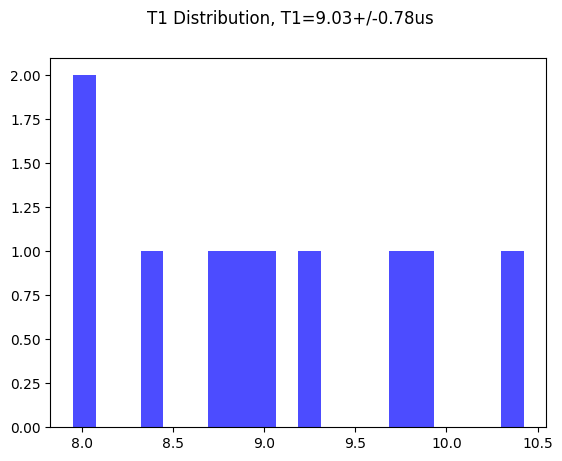

In [ ]:
def histoPlot( data:np.ndarray, save:bool=False):

    fig, ax = plt.subplots()

    bin_width = 0.5
    start_value = np.mean(data)*0.5
    end_value = np.mean(data)*1.5
    custom_bins = [start_value + i * bin_width for i in range(int((end_value - start_value) / bin_width) + 1)]
    hist_values, bin_edges = np.histogram(data, bins=custom_bins, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    mean = round(np.mean(data),2)
    std = round(np.std(data),2)
    # params, covariance = curve_fit(gaussian, bin_centers, hist_values)
    # mu, sigma = params
    ax.hist(data, 20, density=False, alpha=0.7, color='blue', label='Histogram')
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    # p = gaussian(x, mu, sigma)
    # ax.plot(x, p, 'k', linewidth=2, label=f'Fit result: $\mu$={mu:.2f}, $\sigma$={sigma:.2f}')
    # ax.legend()
    fig.suptitle(f'T1 Distribution, T1={mean}+/-{std}us')
    if save:
        plt.savefig("./Data/T1_histo/T1Histo.png")
    plt.show()

histoPlot(np.array(T1_rec['q1']),save=True)

In [3]:
def shut_down(cluster:Cluster,flux_map:dict):
    '''
        Disconnect all the instruments.
    '''
    reset_offset(flux_map)
    cluster.reset() 
    cluster.close()
    Instrument.close_all() 
shut_down(cluster,flux_settable_map)